<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 6: Algoritmos Cuanticos IV</font></td>
    </tr>
</table>

<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        </td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Alumno: Brandon Garay Jacome</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">421081646</font></td>
    </tr>
</table>


<a id="1"></a>
# 1. Ejercicio 1

1. Implementa "a mano" la $QFT$ inversa:
   1. Esribe el código completo de la Transformada Cuántica de Fourier **Inversa** usando Qiskit.
      1. Crea una función llamada `miQFTInv(n)`, que reciba el número de qubits (`n`).
      2. Usa el orden de Qiskit (revisa el contenido de este Lab6).
      3. No puedes usar la clase `QFT` de Qiskit para crear la función `miQFTInv(n)`.
      4. Debe regresar un objeto de tipo `QuantumCircuit`.
   2. Dibuja el circuito correspondiente a la $QFT$ inversa para `n=10`.
      1. Usa la función que escribiste: `miQFTInv(n)`.
   3. Haz otra función que realice la verificación de tu función `miQFTInv(n)` para todos los estados posibles **para cualquier `n`**. Esta segunda función debe hacer lo siguiente:
      1. Internamente debe generar todos los posibles estados. Si por ejemplo recibe el parámetro `n=4`, entonces deberá generar $16$ estados iniciales. Usa un ciclo para recorrer todas las posibilidades.
      2. Por cada iteración:
         1. Se debe crear un circuito para cada uno de los posibles estados. Es decir, agrega compuertas $X$ cuando haya un $1$ en el estado. Recuerda que estás trabajando con el orden de Qiskit.
         2. Aplica tu función `miQFTInv(n)`.
         3. Concatena (compone) en el mismo circuito la $QFT$ *normal*, aquí si puedes usar la clase de Qiskit `QFT`.
         4. Agrega mediciones a todos los qubits.
         5. Realiza la simulación del circuito.
            - Se debe hacer una simulación por cada estado posible.
            - **No** muestres un histograma para cada caso.
            - Muestra que la salida del circuito para cada caso es exactamente el mismo estado que el de entrada.
            - Usa $5000$ shots.
            - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
      3. Ejecuta esta segunda función con `n=4`. Deberá generar $16$ resultados.
</br>

<a id="1"></a>
## 1.1.Creación de`miQFTInv(n)`

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np

def miQFTInv(n):
    qftinv_circuit = QuantumCircuit(n)
    for i in reversed (range(n // 2)):
        qftinv_circuit.swap(i, n - i - 1)
    qftinv_circuit.barrier()
    for j in (range(n)):
        for k in range(j):
            qftinv_circuit.cp(-np.pi / 2**(j - k), k, j)
        qftinv_circuit.h(j)
        qftinv_circuit.barrier()
    return qftinv_circuit

<a id="1"></a>
## 1.2.Dibujado

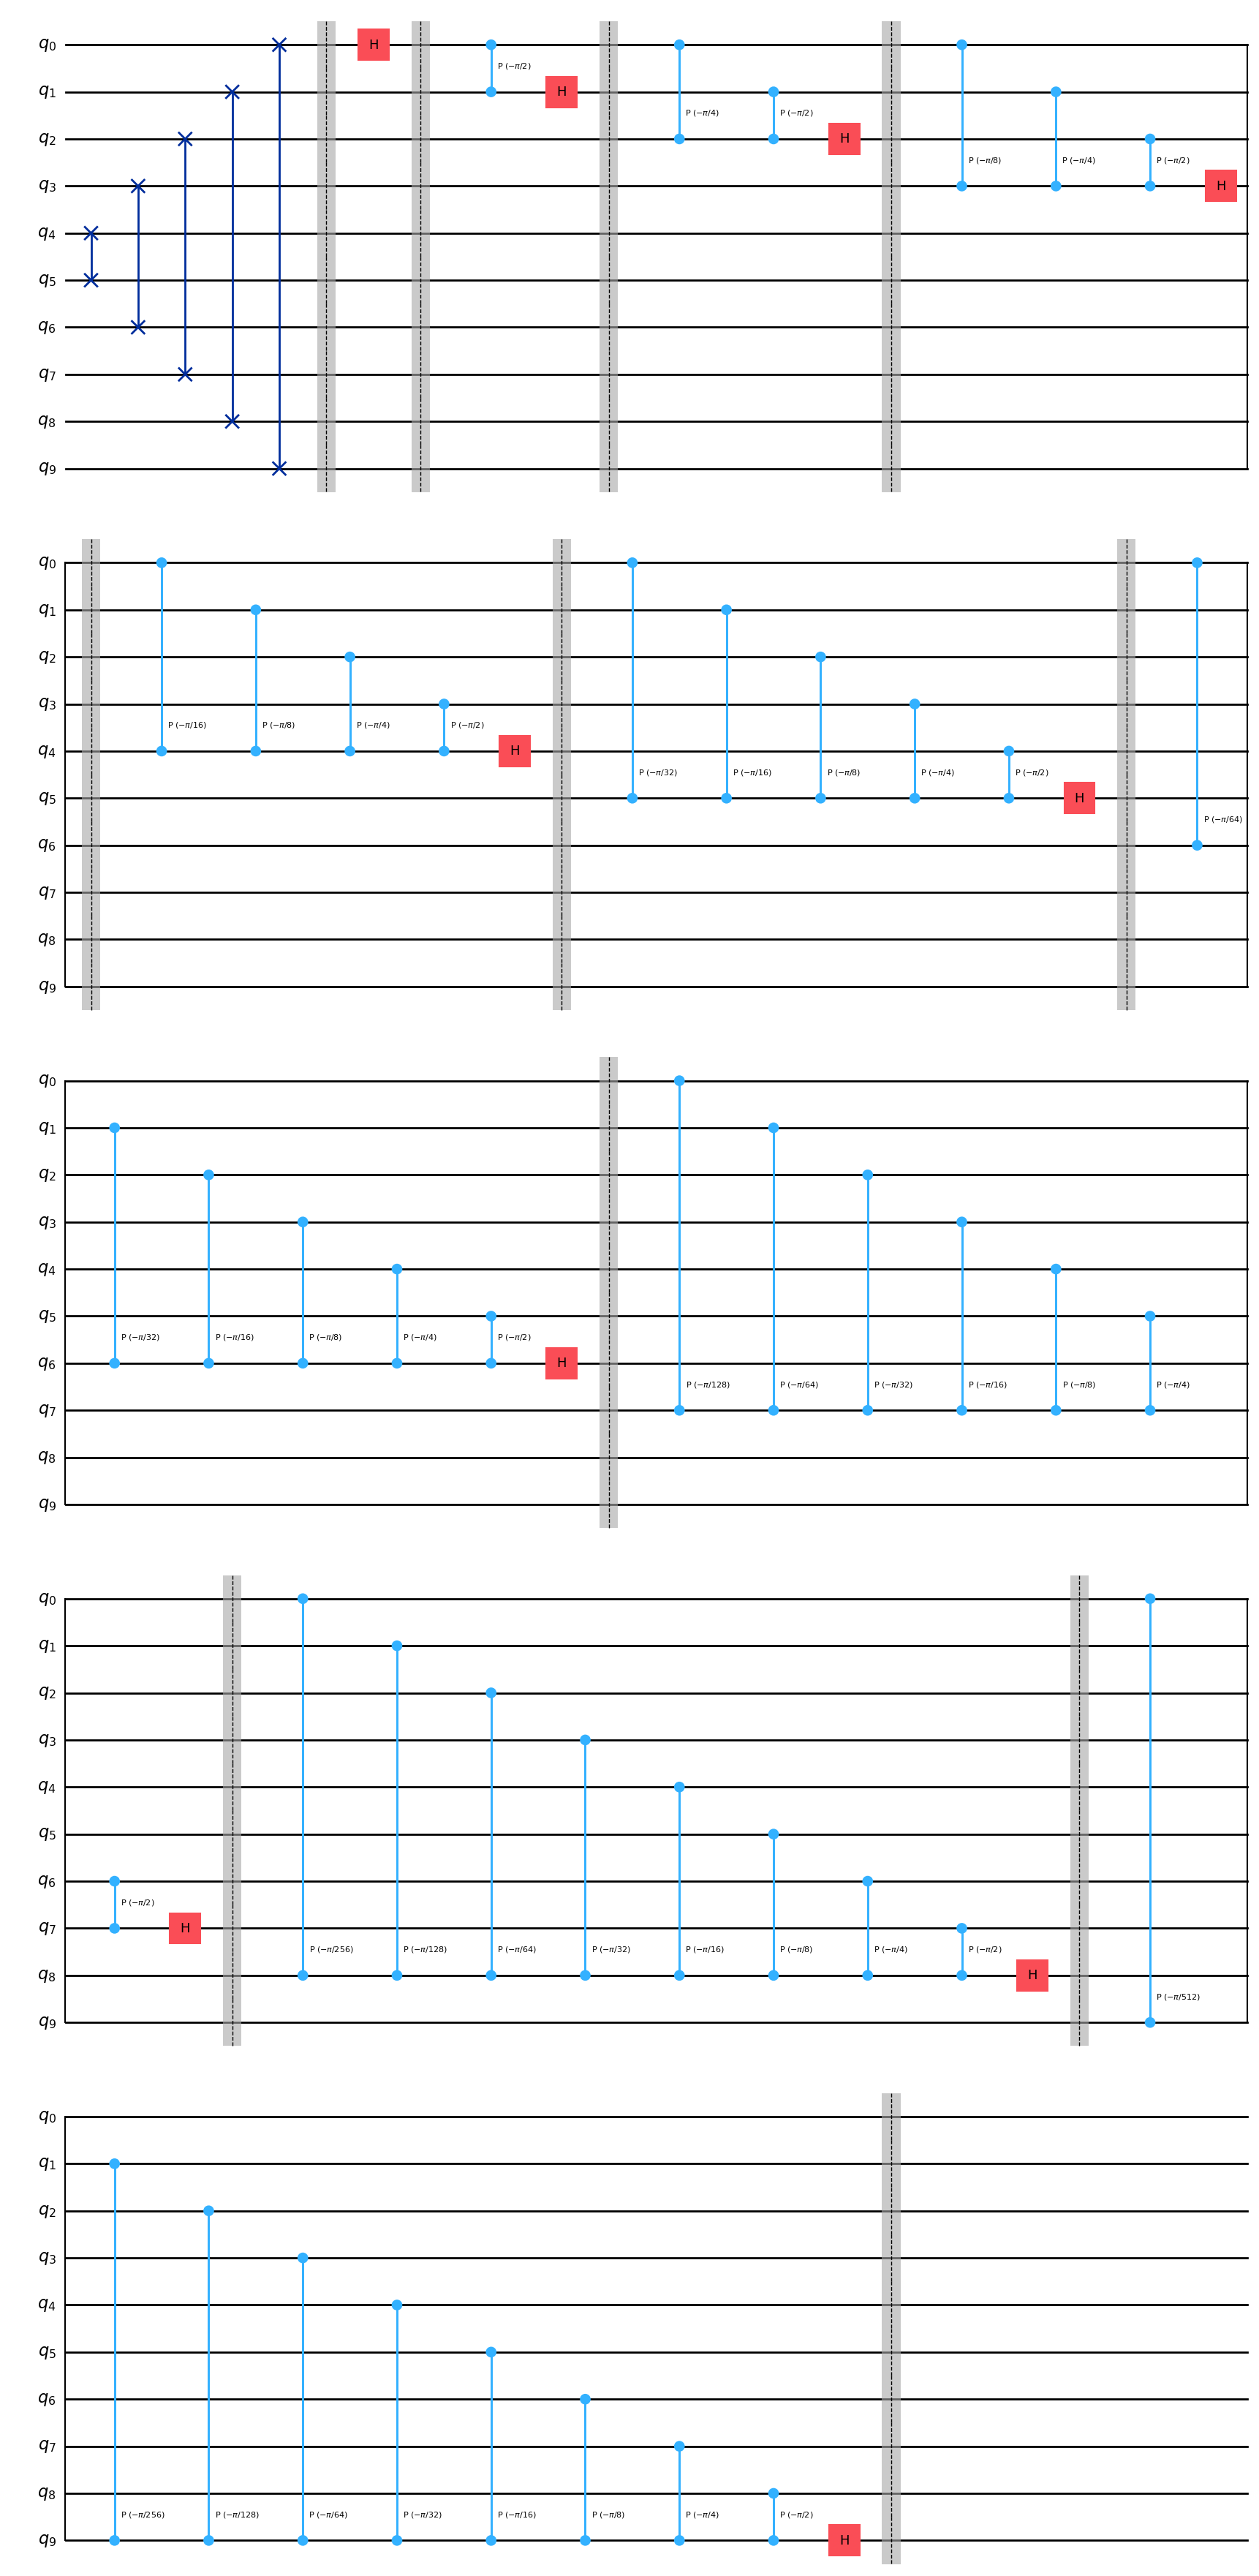

In [2]:
Inversa = miQFTInv(10)
Inversa.draw('mpl')

<a id="1"></a>
## 1.3.Haz otra función que realice la verificación de tu función `miQFTInv(n)` para todos los estados posibles **para cualquier `n`**. 

In [3]:
# Función para verificar el efecto de aplicar la QFT inversa seguida de la QFT
def verificarInversa(n):
    # Calculamos el número total de combinaciones posibles con n qubits
    total = 2**n

    for i in range(total):
        bin_str = format(i, f'0{n}b')                     # Representación binaria del número con n dígitos
        circuito_Estados = QuantumCircuit(n, n)           # Creamos un circuito con n qubits y n bits clásicos

        # Configuración del estado inicial |i⟩
        for idx, bit in enumerate(reversed(bin_str)):     # Invertimos por el orden de los qubits en Qiskit
            if bit == '1':
                circuito_Estados.x(idx)                   # Aplicamos la compuerta X si el bit es 1
        circuito_Estados.barrier()                        # Se añade una barrera para delimitar etapas

        # Se obtiene la transformada cuántica inversa definida por el usuario
        qftInv = miQFTInv(n)
        circuitoInv = circuito_Estados.compose(qftInv)    

        # Agregamos la QFT estándar utilizando la clase de Qiskit
        qft = QFT(4, insert_barriers=True)
        circuitoComp = circuitoInv.compose(qft)           
        circuitoComp.barrier()                           

        # Mediciones en todos los qubits
        for i in range(n):
            circuitoComp.measure(i, i)                   

        shots = 5000                                      

        sampler = StatevectorSampler()                    # Inicializamos el simulador basado en vectores de estado
        job_sampler = sampler.run([circuitoComp], shots=shots)
        conteos = job_sampler.result()[0].data.c.get_counts()

        # Se imprimen los resultados con sus respectivas probabilidades
        for outcome in conteos:
            print("Resultado:", outcome, "\nProbabilidad:", conteos[outcome]/shots)

        # Se muestra gráficamente el circuito
        display(circuitoComp.draw('mpl'))
    
    return circuitoComp


<a id="1"></a>
## 1.4.Ejecutar para n = 4

Resultado: 0000 
Probabilidad: 1.0


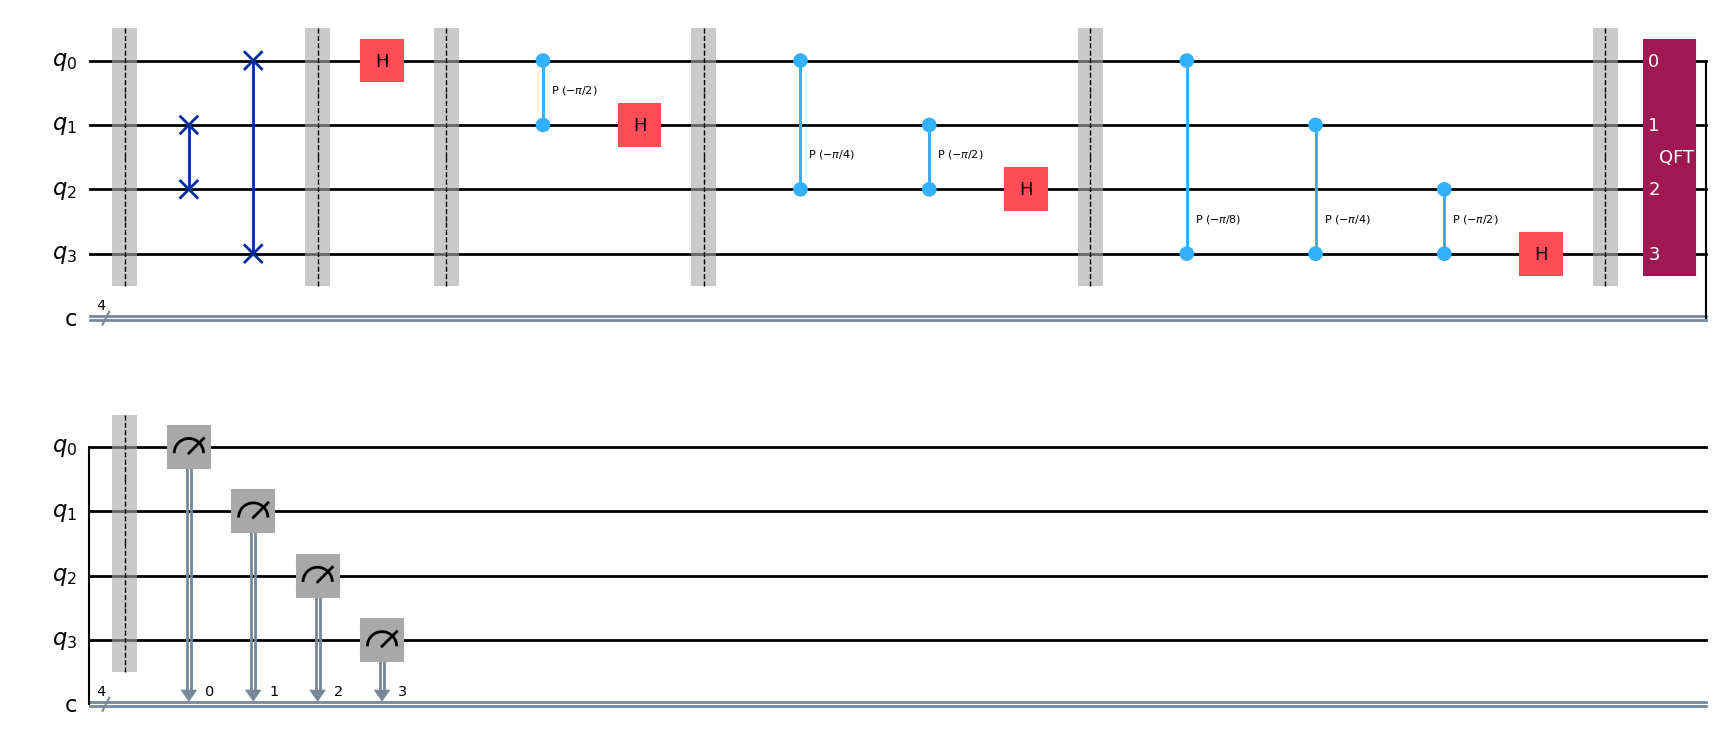

Resultado: 0001 
Probabilidad: 1.0


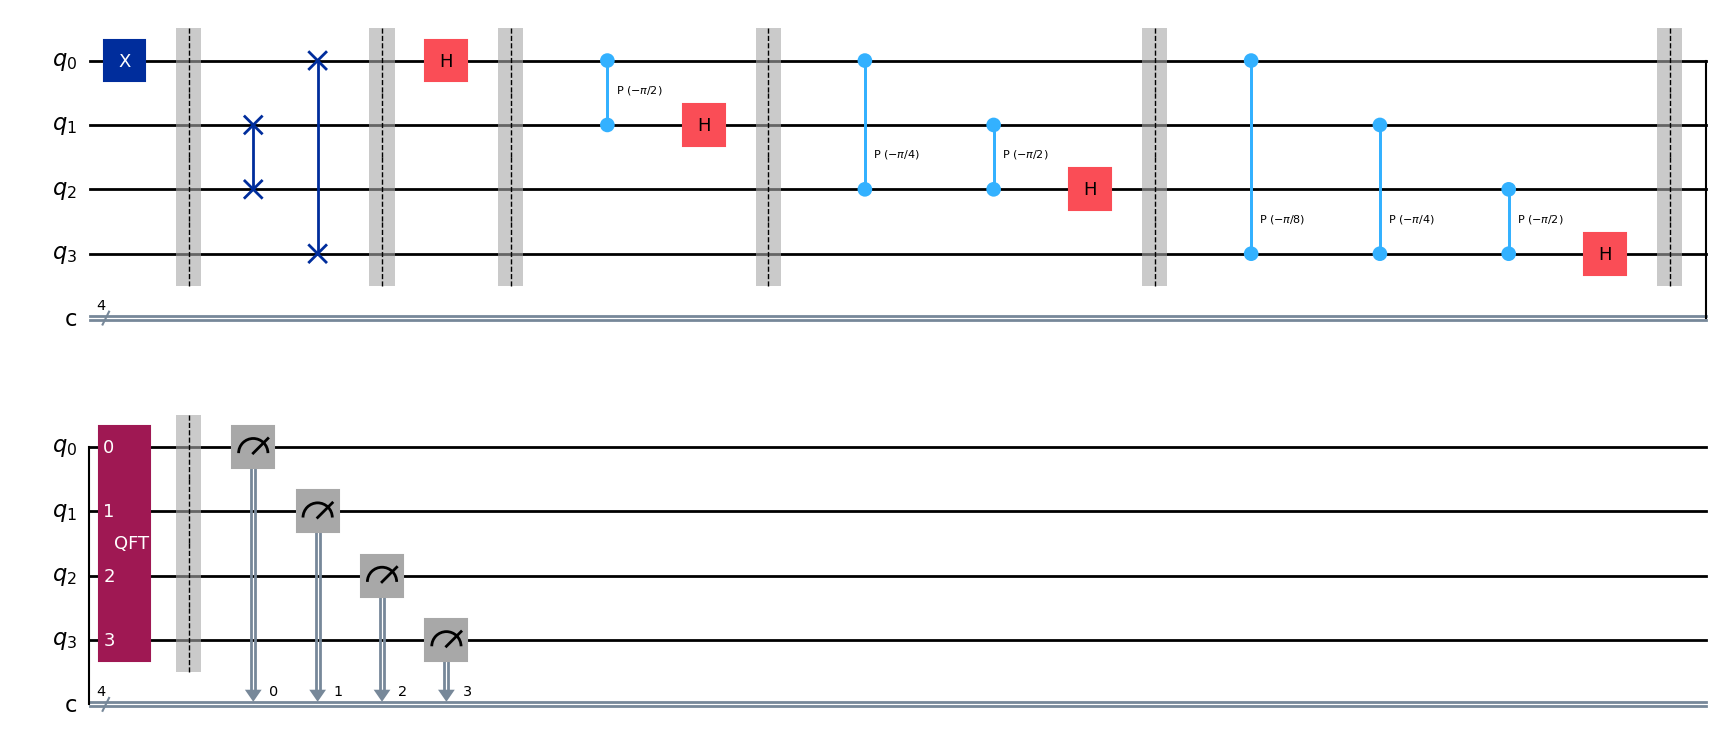

Resultado: 0010 
Probabilidad: 1.0


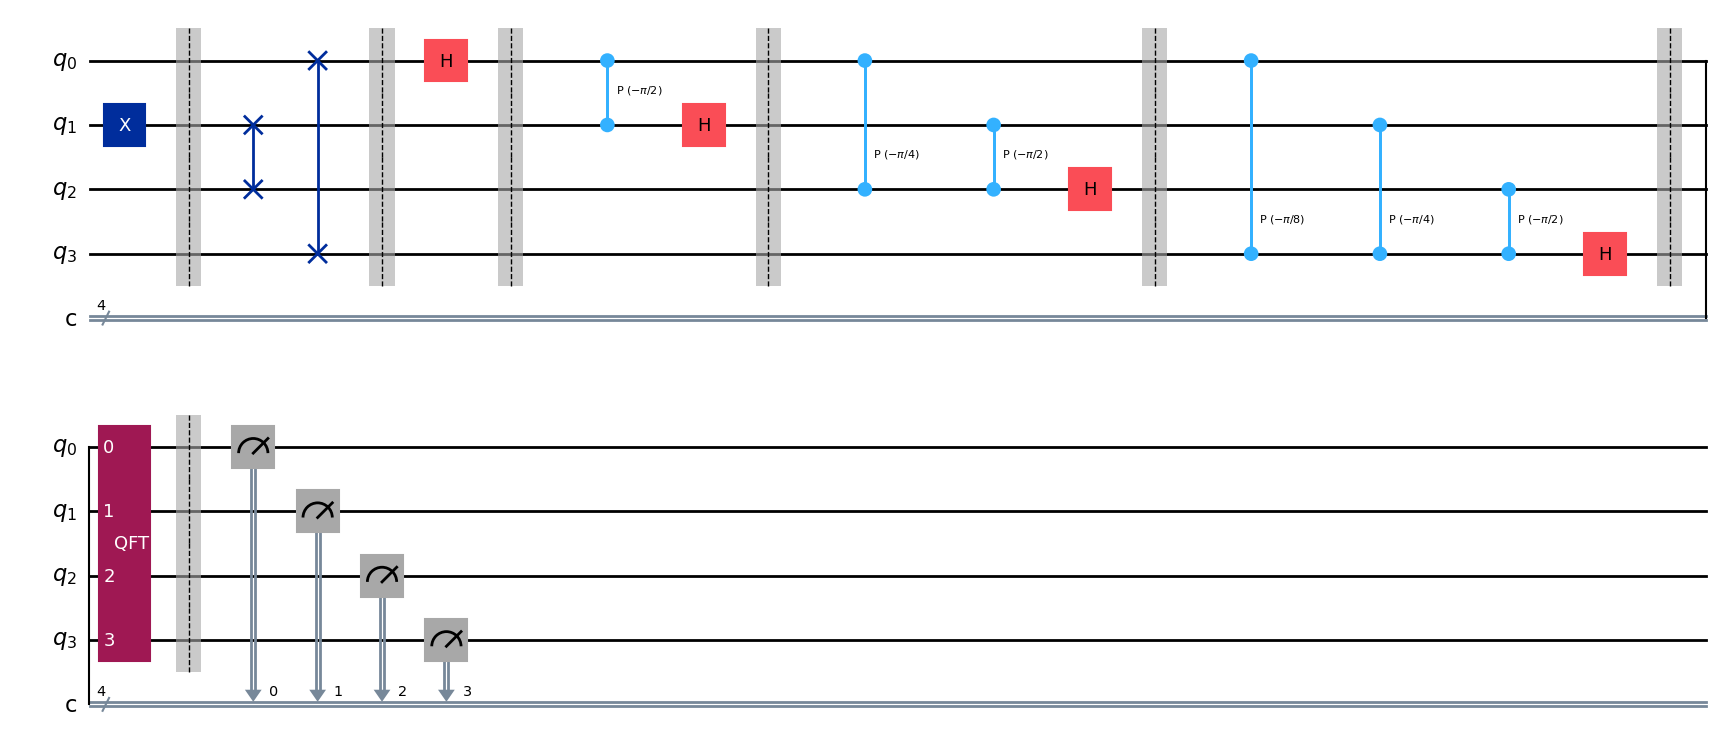

Resultado: 0011 
Probabilidad: 1.0


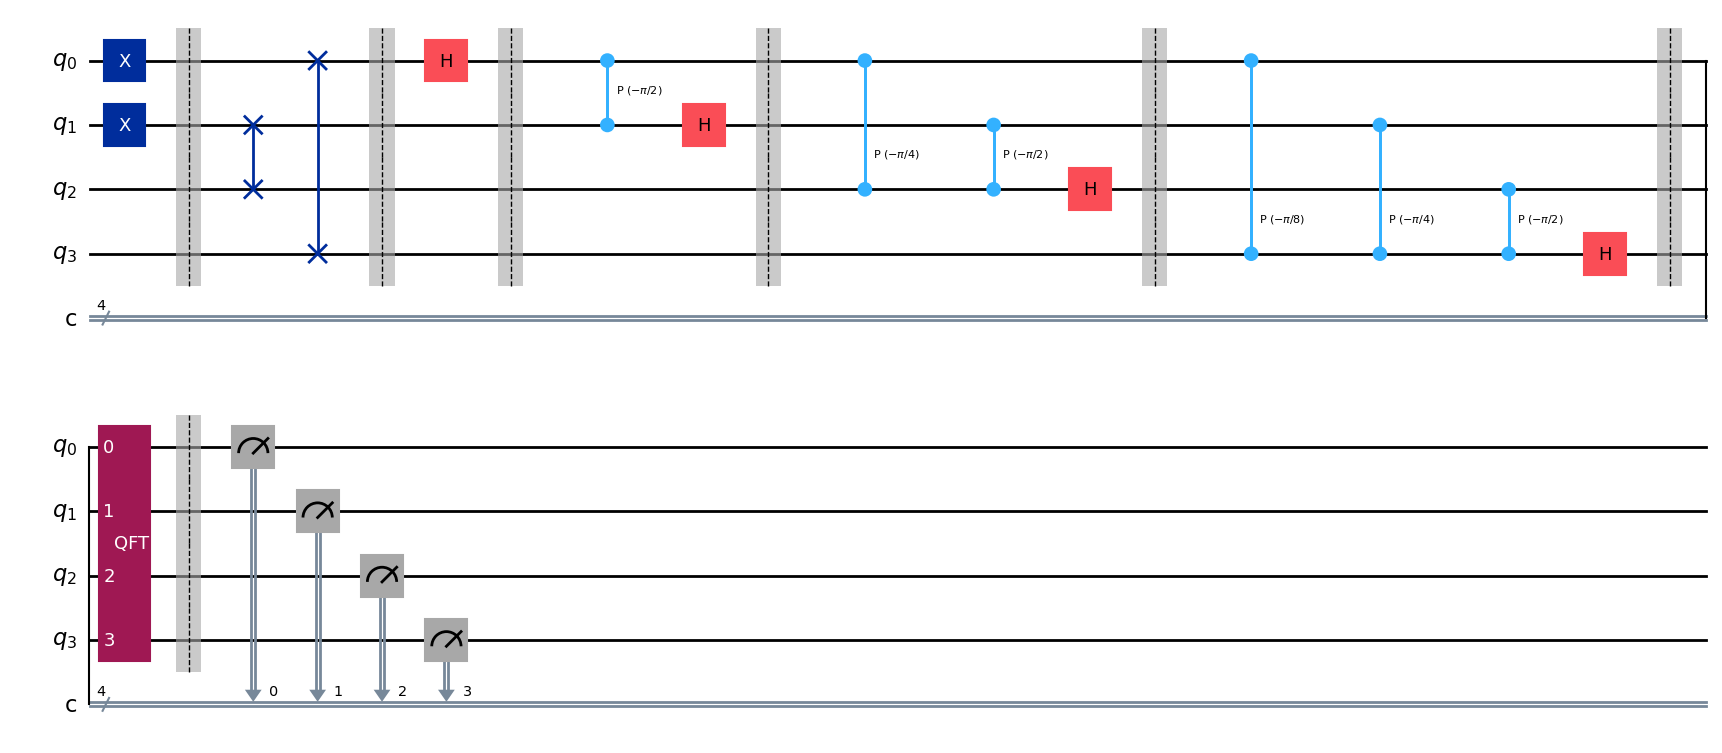

Resultado: 0100 
Probabilidad: 1.0


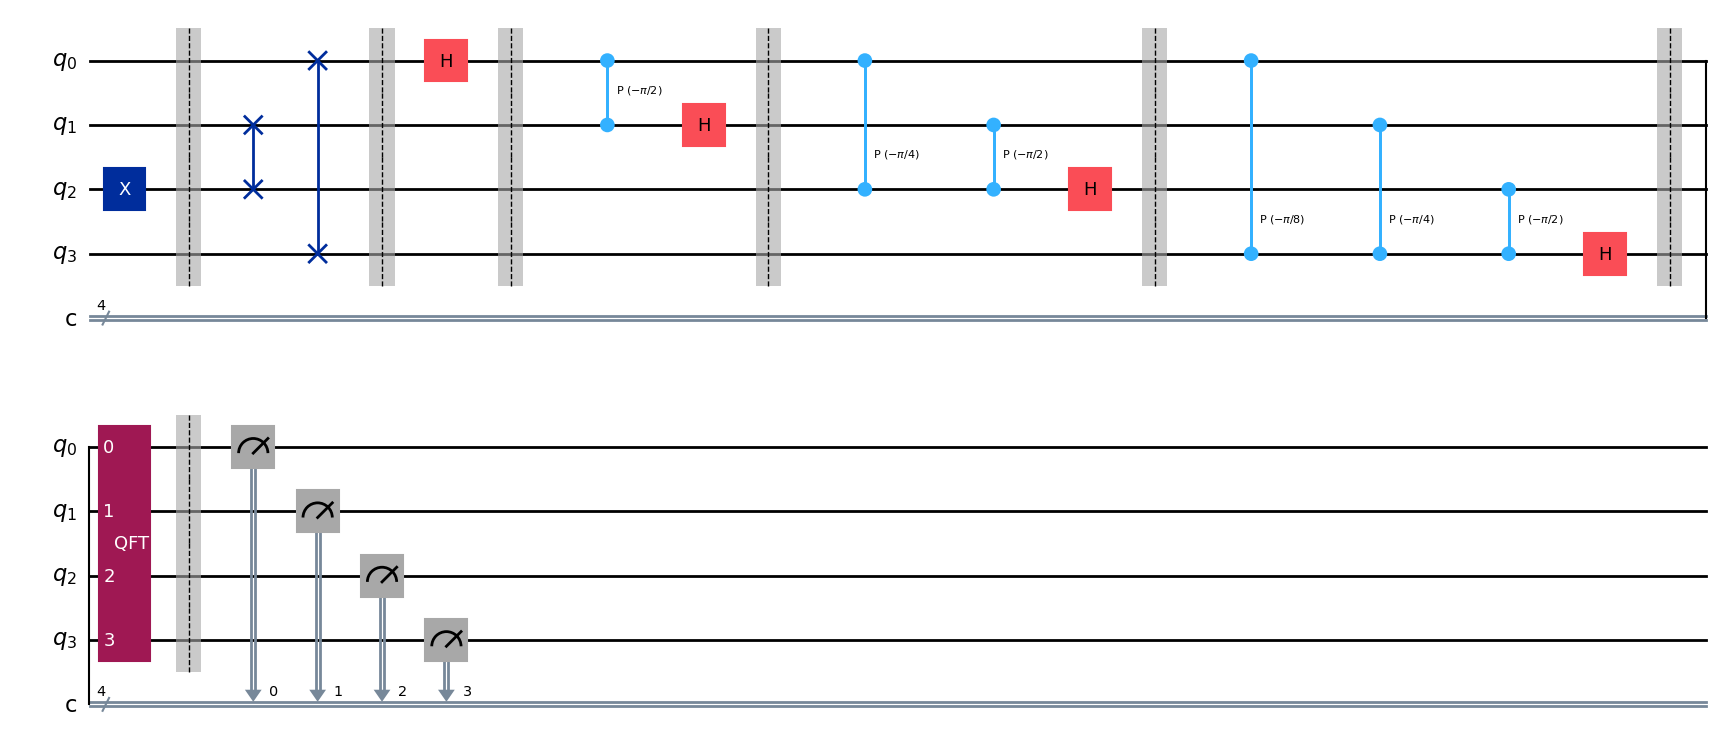

Resultado: 0101 
Probabilidad: 1.0


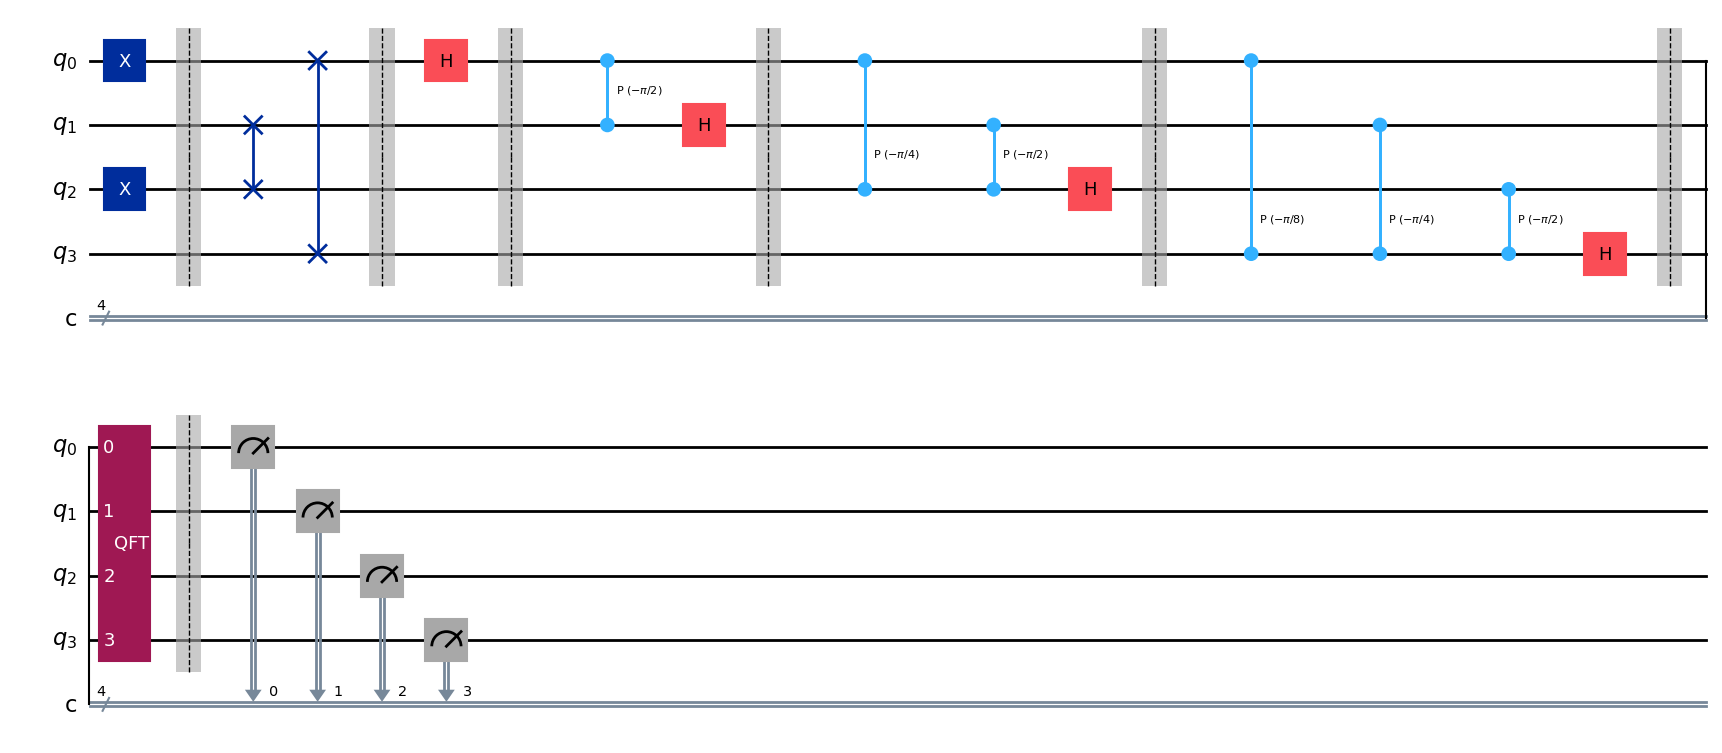

Resultado: 0110 
Probabilidad: 1.0


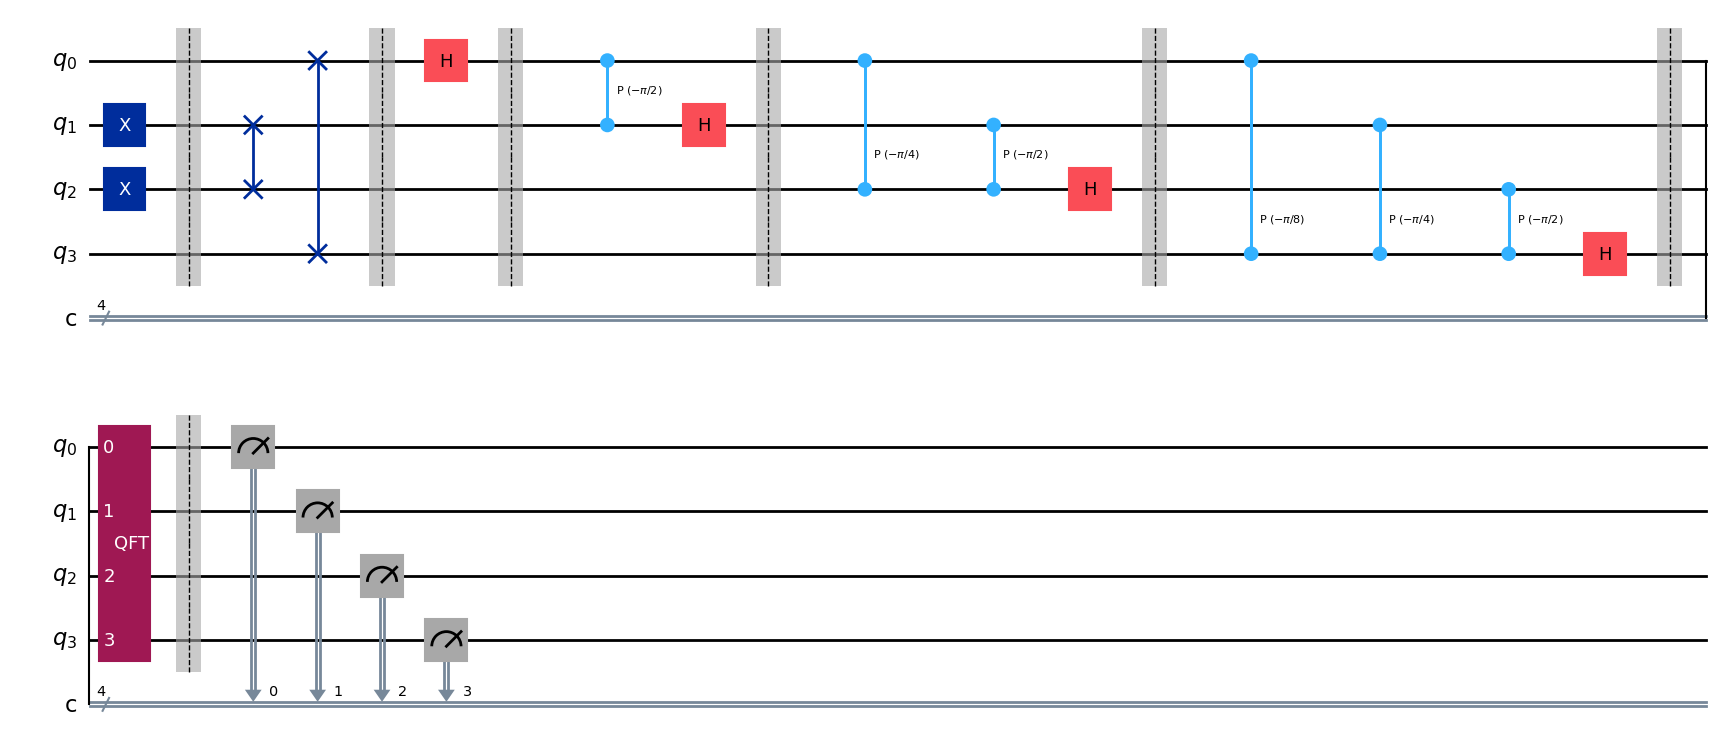

Resultado: 0111 
Probabilidad: 1.0


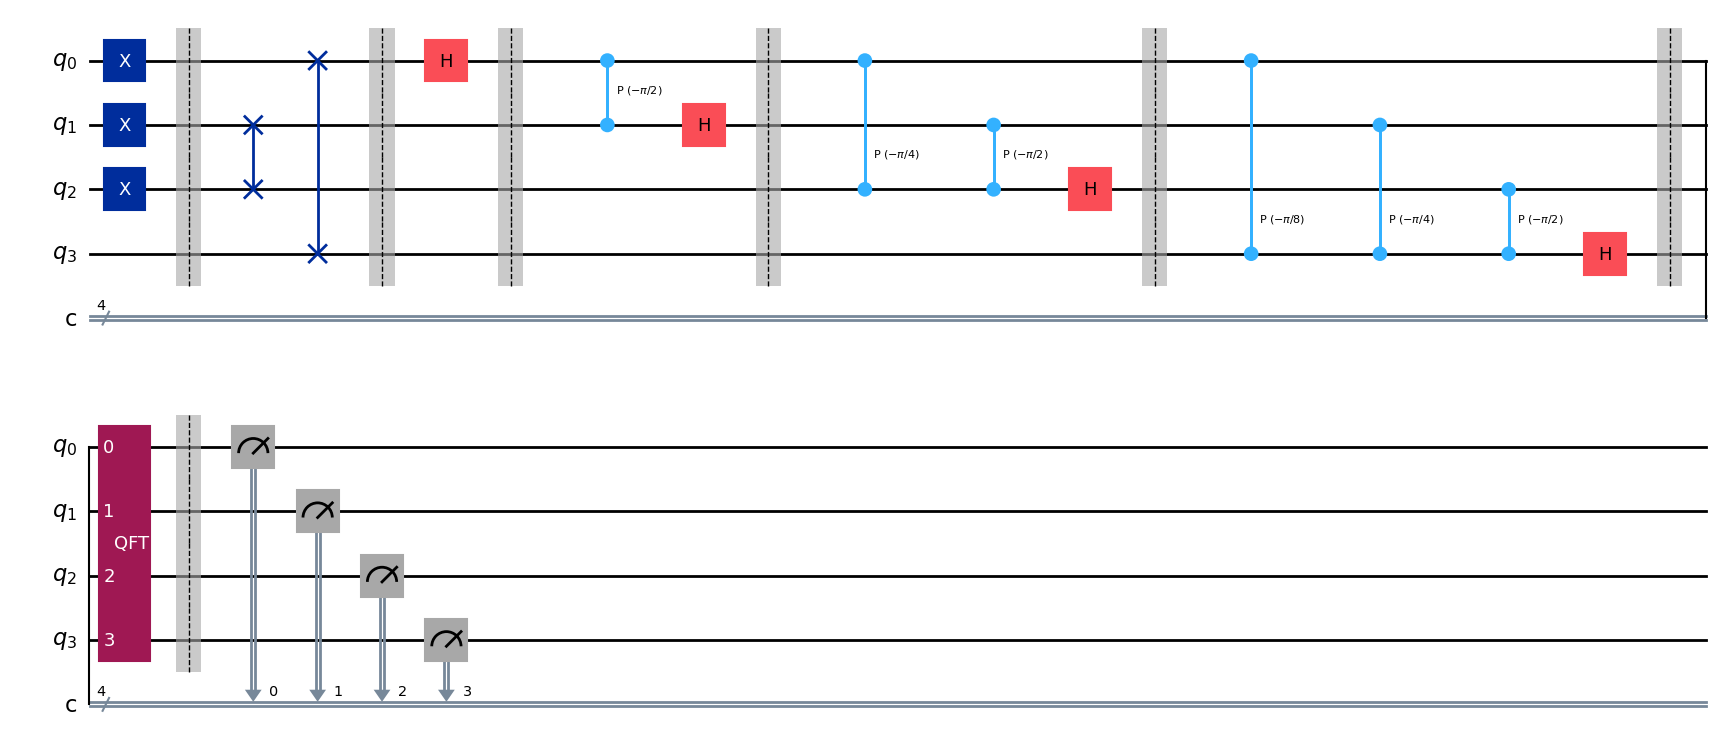

Resultado: 1000 
Probabilidad: 1.0


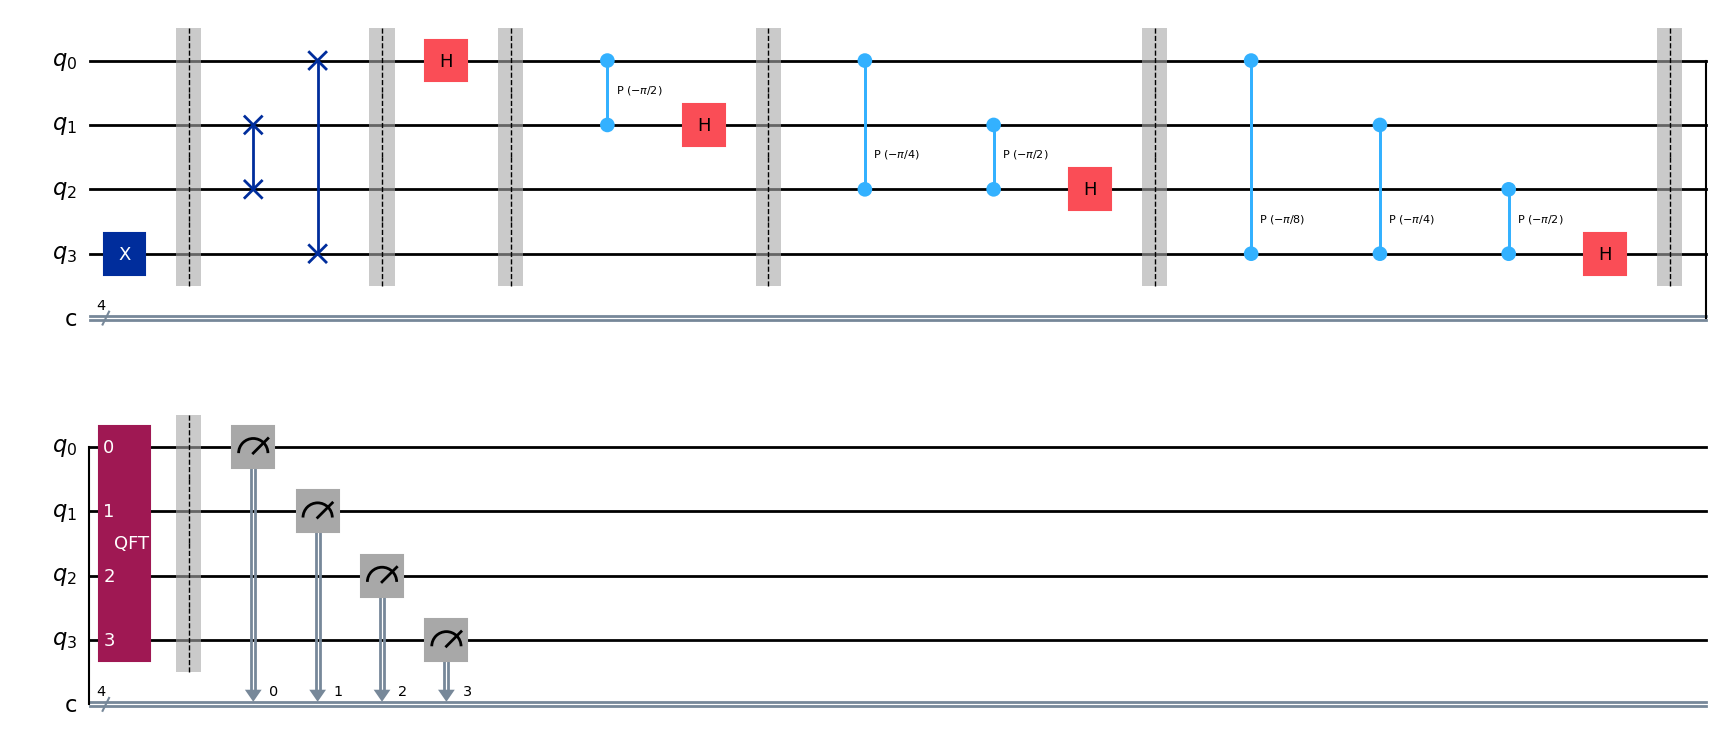

Resultado: 1001 
Probabilidad: 1.0


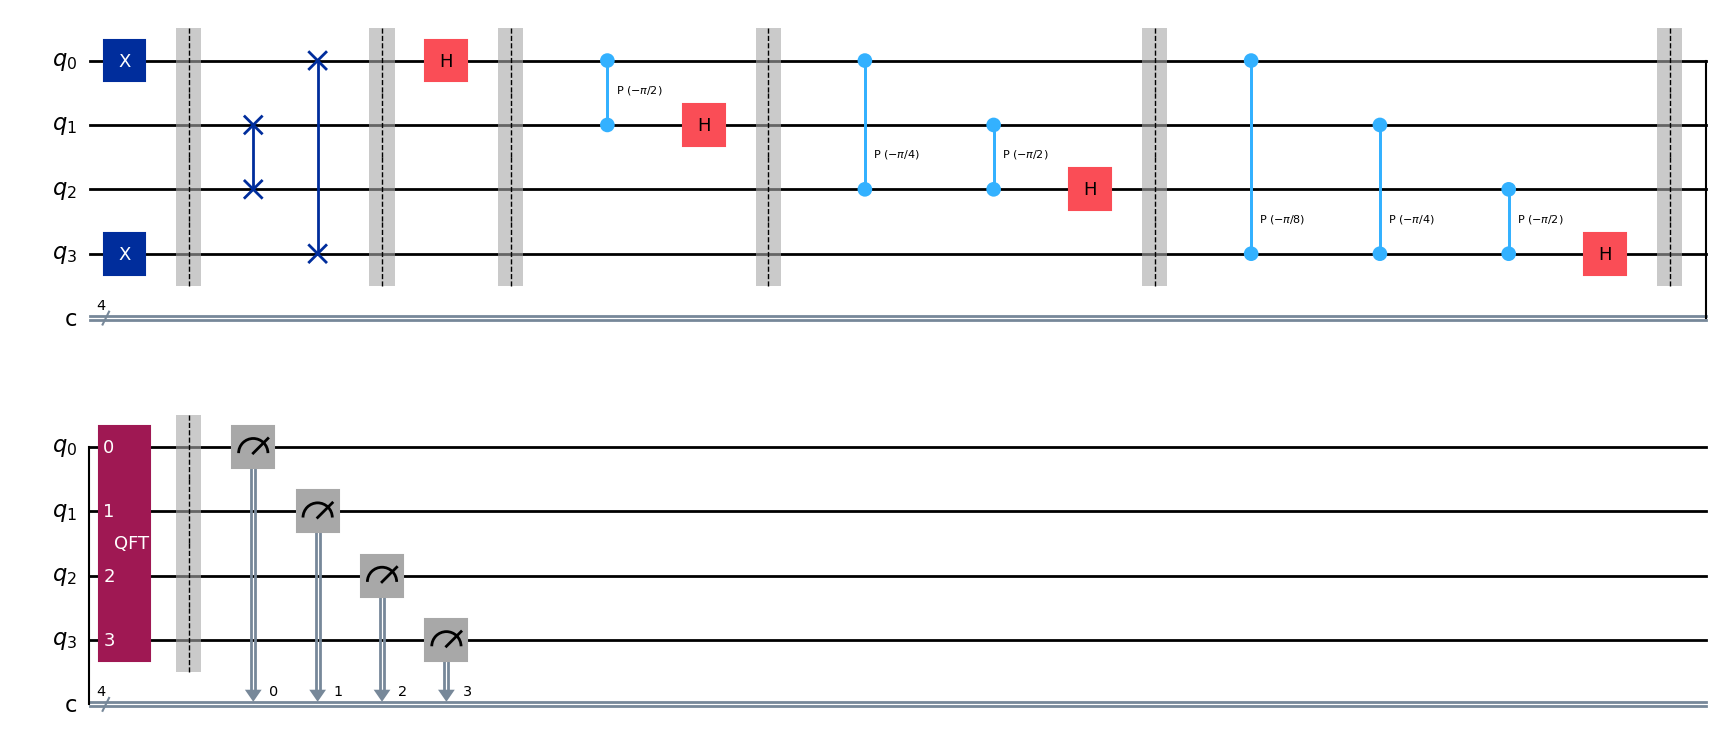

Resultado: 1010 
Probabilidad: 1.0


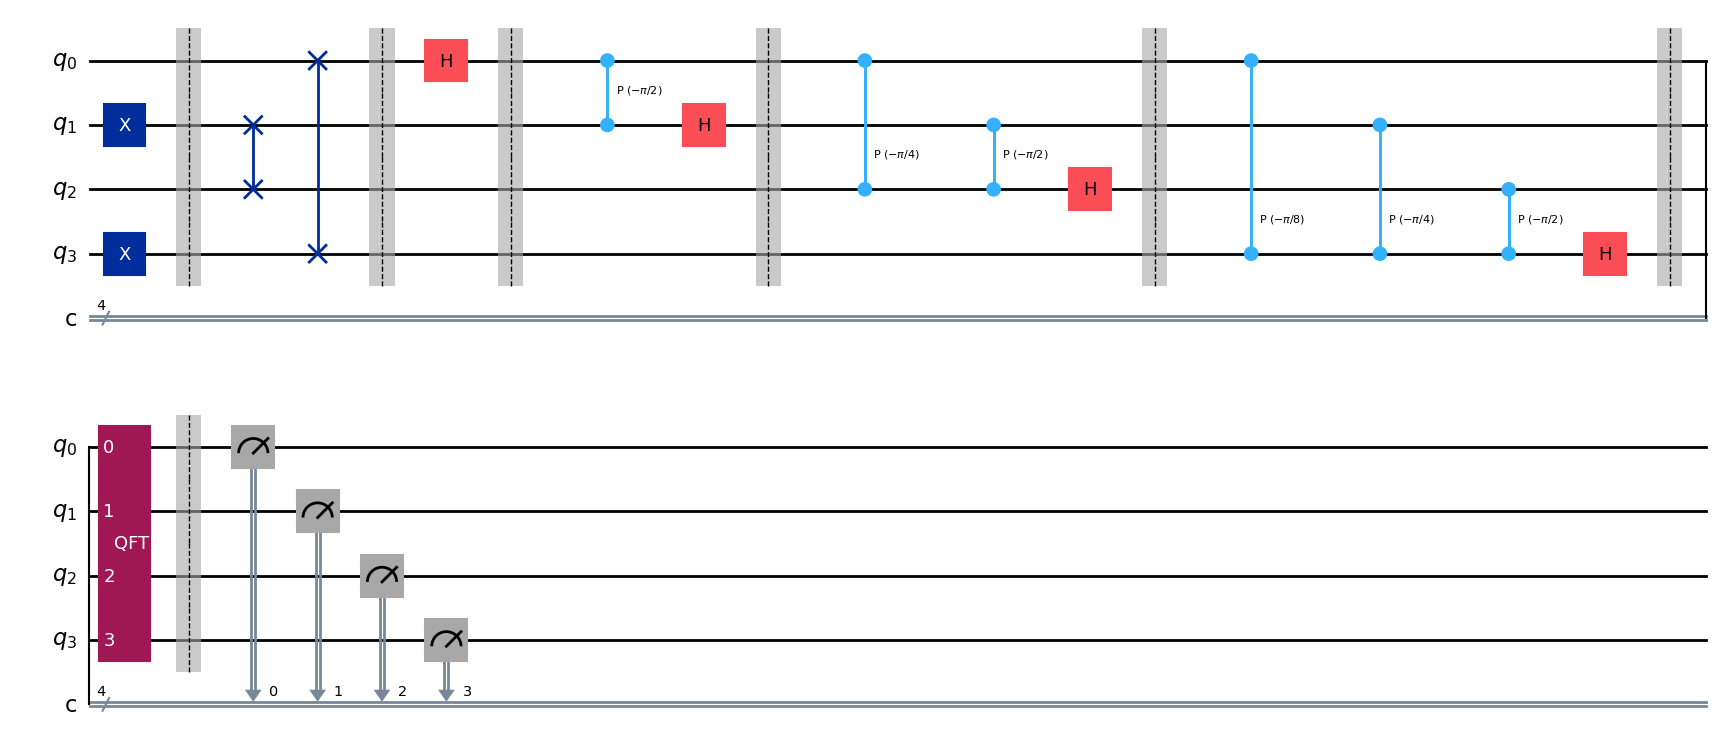

Resultado: 1011 
Probabilidad: 1.0


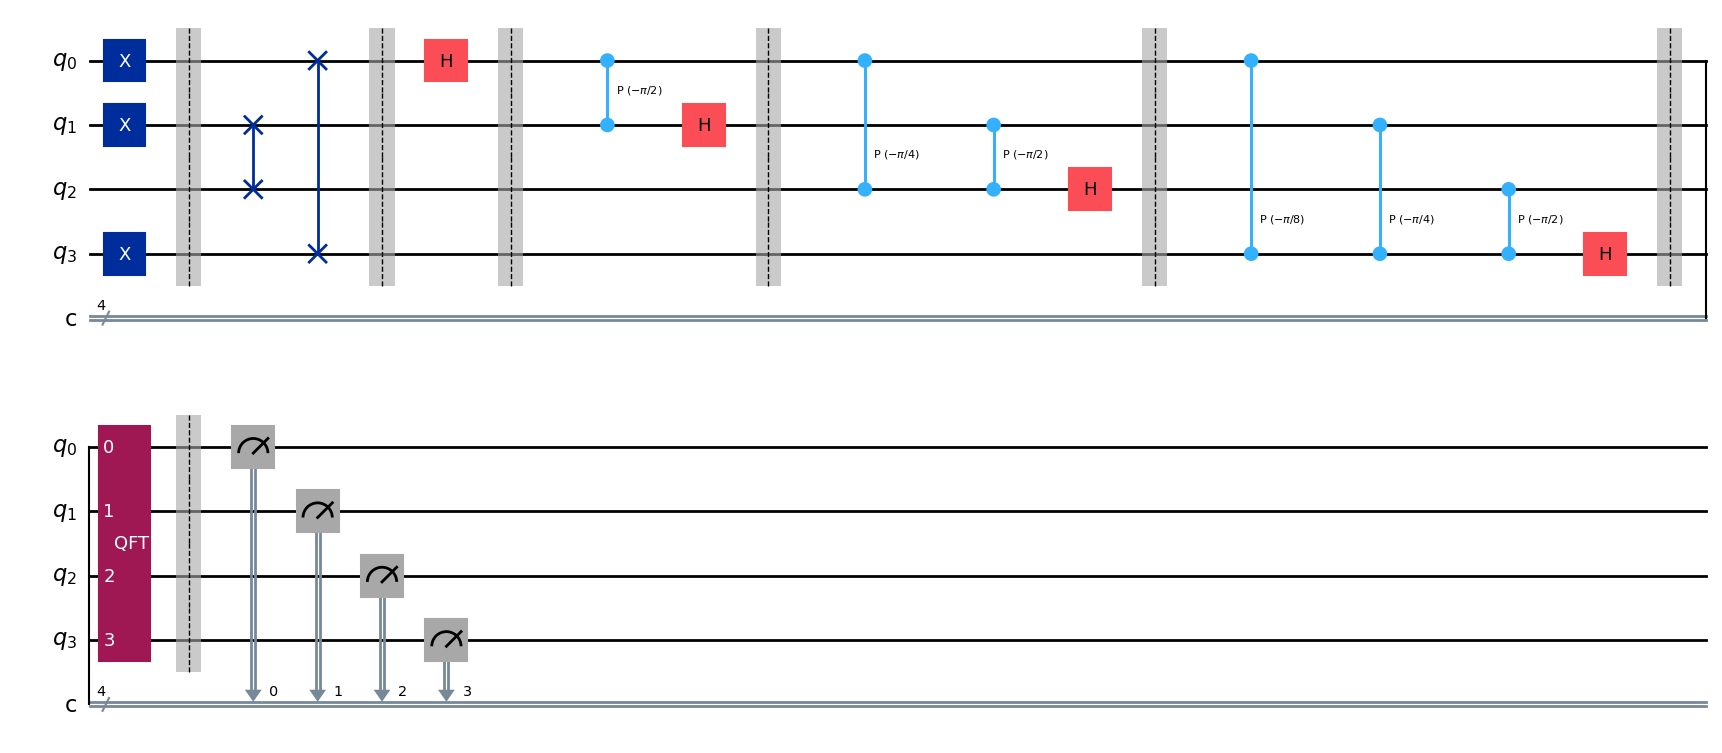

Resultado: 1100 
Probabilidad: 1.0


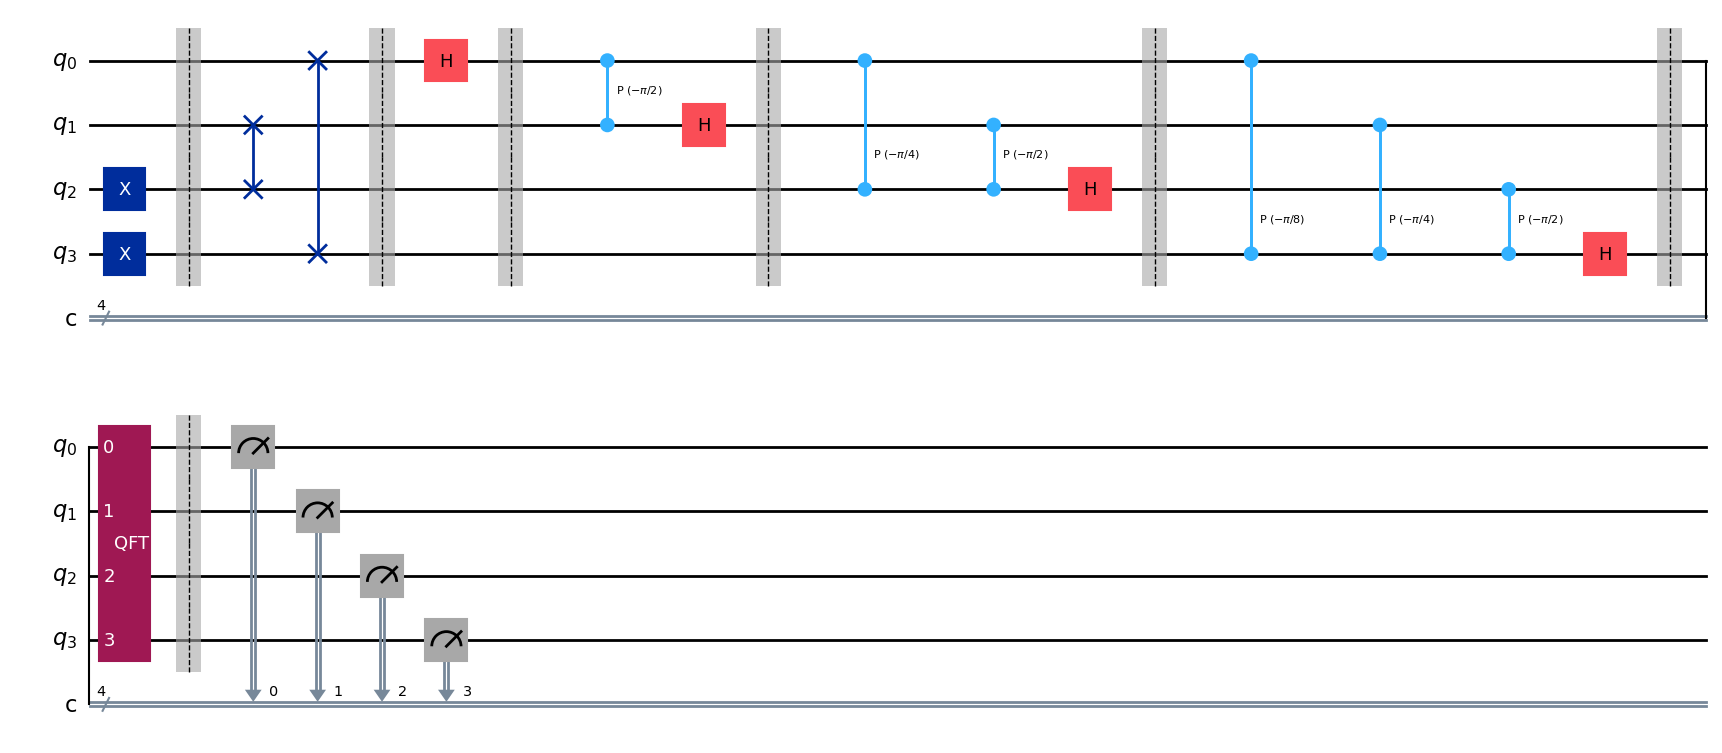

Resultado: 1101 
Probabilidad: 1.0


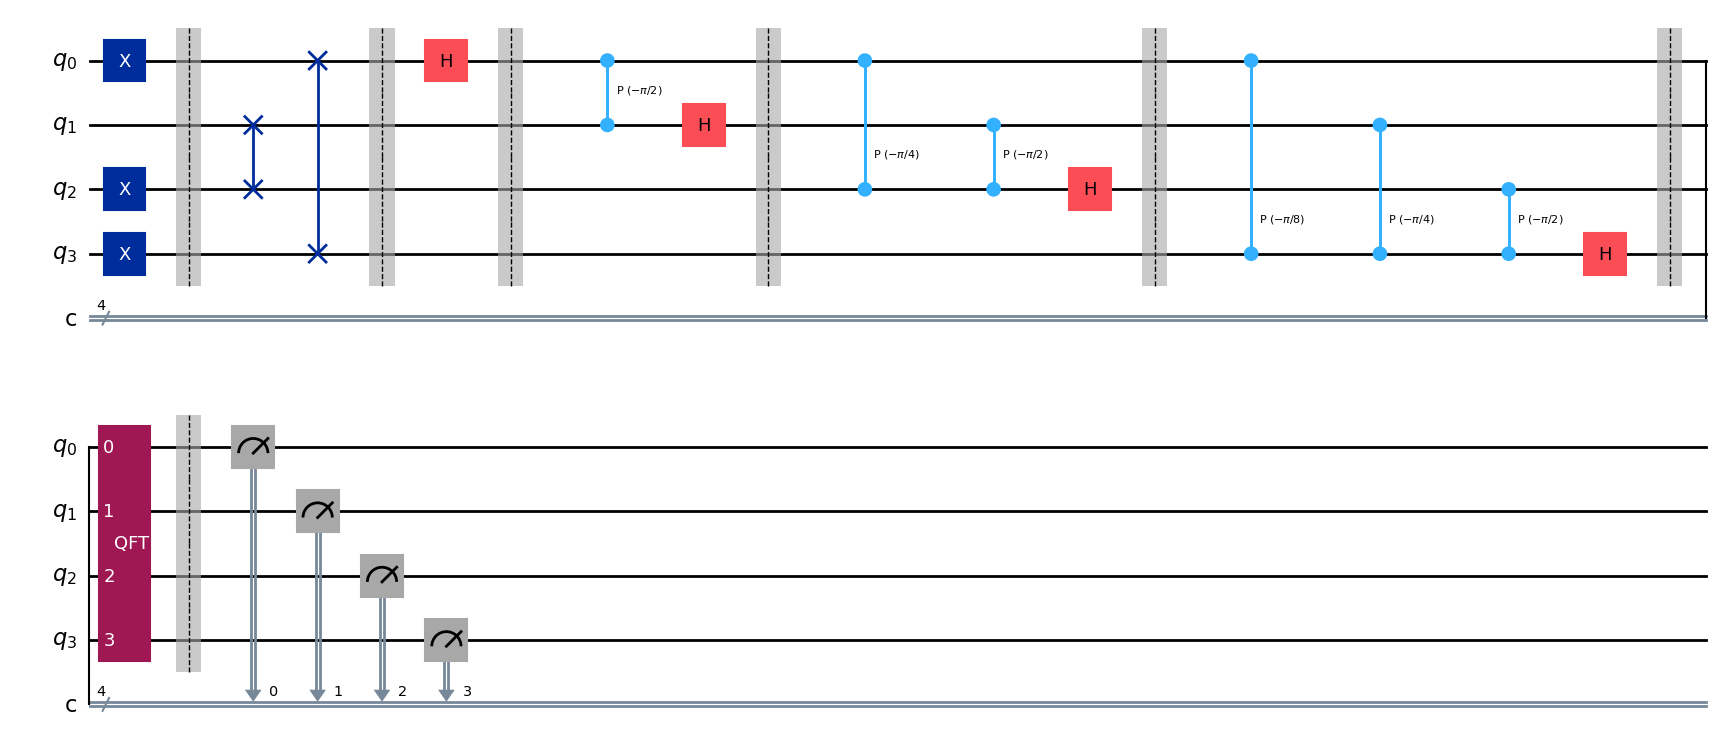

Resultado: 1110 
Probabilidad: 1.0


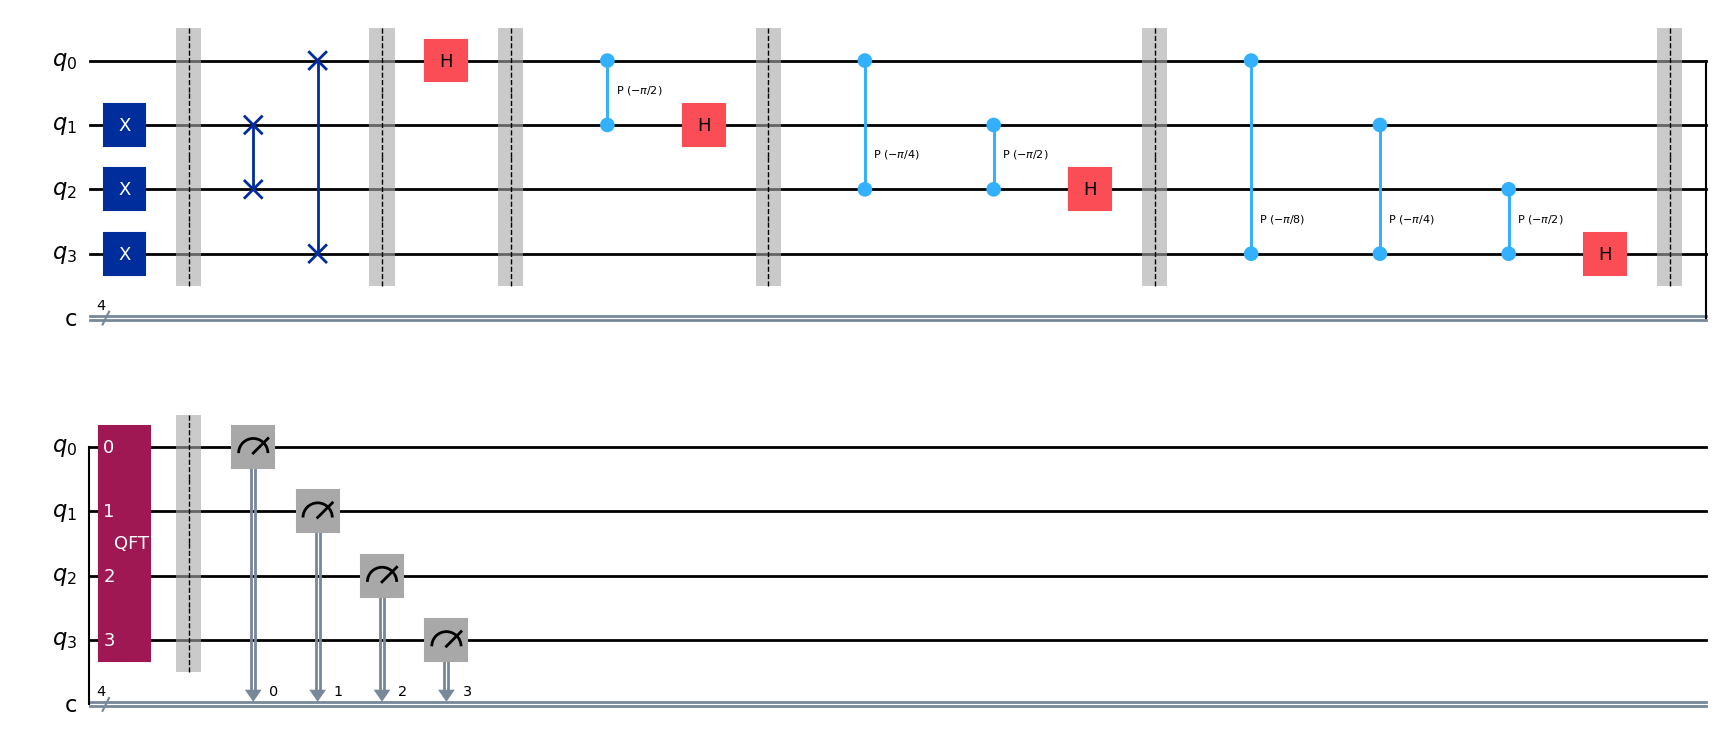

Resultado: 1111 
Probabilidad: 1.0


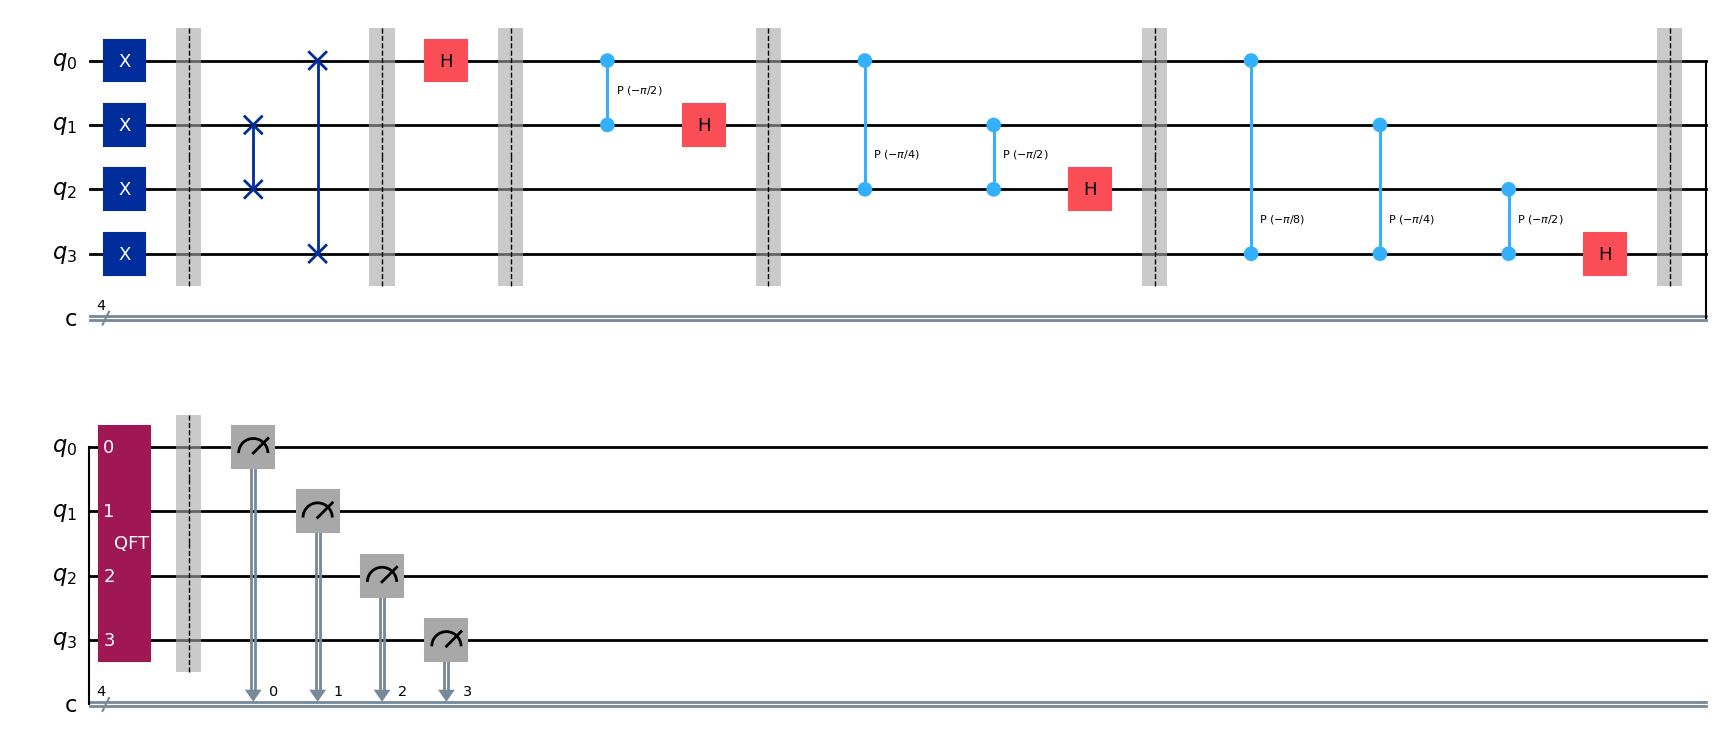

In [4]:
muestra = verificarInversa(4)

<a id="1"></a>
# 2. Ejercicio 2

2. Escribe el código para estimar la fase $\phi=0.15625$.
    1. Escribe la función para $CU$.
       - Revisa los ejemplso de este Lab6.
    2. Usa todo el código necesario pára determinar la fase.
    3. Usa tu función `miQFTInv(n)` que escribiste para el ejercicio anterior.
       - No uses la clase `QFT` de Qiskit.
    5. Determina con precisión el valor del tamaño del registro $t$.
       1. Calcula numéricamente este valor. Usa $m=4$ y $\varepsilon=0.1$.
       2. Valida con un ciclo si el valor calculado de $t$ es correcto o si con otro valor se puede calcular $\phi$ con toda precisión.
       3. Escribe en una celda de markdown el valor correcto de $t$.
</br>

## 2.1.Escribir funcion CU

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
def CU(circuit, power, qcontrol, target):
    circuit.cp((2*np.pi * 0.15625) * (2**power), qcontrol, target)

## 2.2.Usar la funcion `miQFTInv(n)` 

In [6]:
for t in range(1, 7):  # Tamaños del registro de 1 a 6

    n = 1  # Solo un qubit en el registro del eigenvector

    control = QuantumRegister(t, 'j')
    target = QuantumRegister(n, 'psi')
    circuit = QuantumCircuit(control, target)

    circuit.h(control)       # Superposición en qubits de control
    circuit.x(target)        # Estado inicial del objetivo: |1⟩

    # Aplicación de operadores controlados según la posición
    for j in reversed(range(t)):
        CU(circuit, j, control[j], target)

    # Añadimos la QFT inversa personalizada
    qftInv = miQFTInv(t)
    circuit.compose(qftInv, inplace=True, qubits=control)

    # Registro clásico y medición
    cr = ClassicalRegister(t, 'res')
    circuit.add_register(cr)
    circuit.measure(control, cr)

    # Simulación
    sampler = StatevectorSampler()
    job_sampler = sampler.run([circuit])
    job_sampler.result()

    data = job_sampler.result()[0].data.res.get_counts()
    max_key = max(data, key=data.get)  # Se identifica el valor más frecuente
    freq = int(max_key, 2)             # Valor binario convertido a decimal

    print(t, ":\t phi =", freq / 2**t)  # Resultado de la fase estimada


1 :	 phi = 0.0
2 :	 phi = 0.25
3 :	 phi = 0.125
4 :	 phi = 0.1875
5 :	 phi = 0.15625
6 :	 phi = 0.15625


## 2.3.Determinar presicion 

Teniendo:  
$m=4$, $\varepsilon=0.1$.  
Se puede obtener $$ t = m + \left \lceil \log \left (2 + \frac{1}{2\varepsilon} \right) \right \rceil $$

$$\therefore t = 4 + \left \lceil \log \left (2 + \frac{1}{2(0.1)} \right) \right \rceil = 6.80735$$

$$\therefore t = 6.807735 \approx 6$$

El calculo suguiere a $t$ =6,  pero con $t$ =5 ya se obtiene un aestimacion precisa de la fase